# Import Necessary Libraries

In [1]:
!pip install xgboost

In [2]:
!pip install lightgbm

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
#import xgboost as xgb
#import lightgbm as lgb
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score

import warnings
warnings.filterwarnings('ignore')

 # Import Data

In [4]:
credit_card_data = pd.read_csv("credit_card_clean.csv")
credit_card_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,female,university,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,university,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,university,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,university,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,university,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,male,highschool,married,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,male,highschool,single,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,male,university,single,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,male,highschool,married,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


# Data Understanding

# Exploring the variable :

###    ID : ID of each client

###    LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

###   SEX: Gender (1=male, 2=female)

###    EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

###    MARRIAGE: Marital status (1=married, 2=single, 3=others)

###    AGE: Age in years

###   PAY_1: Repayment status in September, 2005 (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

###    PAY_2: Repayment status in August, 2005 (scale same as above)

###    PAY_3: Repayment status in July, 2005 (scale same as above)

###    PAY_4: Repayment status in June, 2005 (scale same as above)

###    PAY_5: Repayment status in May, 2005 (scale same as above)

###    PAY_6: Repayment status in April, 2005 (scale same as above)

###    BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

###    BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

###    BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

###    BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

###    BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

###    BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

###    PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

###    PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

###    PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

###    PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

###    PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

###    PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)


## Target variable :
### default.payment.next.month: Default payment (1=yes, 0=no)

### *Note: NT is Taiwain Dollars*

In [5]:
credit_card_data.shape

(30000, 25)

In [6]:
credit_card_data.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
count,30000.000000,30000.000000,30000,30000,30000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
unique,NaN,NaN,2,4,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,female,university,single,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,18112,14030,15964,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15000.500000,167484.322667,NaN,NaN,NaN,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,NaN,NaN,NaN,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,NaN,NaN,NaN,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,NaN,NaN,NaN,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,NaN,NaN,NaN,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,NaN,NaN,NaN,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000


In [7]:
credit_card_data.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

In [8]:
credit_card_data.dtypes

ID             int64
LIMIT_BAL    float64
SEX           object
EDUCATION     object
MARRIAGE      object
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
DEFAULT        int64
dtype: object

## Data Preprocessing

In [9]:
le = LabelEncoder()
credit_card_data['SEX']       = le.fit_transform(credit_card_data['SEX'])
credit_card_data['EDUCATION'] = le.fit_transform(credit_card_data['EDUCATION'])
credit_card_data['MARRIAGE']  = le.fit_transform(credit_card_data['MARRIAGE'])

In [10]:
credit_card_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,0,3,0,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,0,3,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,0,3,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,0,3,0,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,3,0,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,1,0,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,1,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,3,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,1,0,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [11]:
credit_card_data.dtypes

ID             int64
LIMIT_BAL    float64
SEX            int32
EDUCATION      int32
MARRIAGE       int32
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
DEFAULT        int64
dtype: object

In [12]:
del credit_card_data['ID']

In [13]:
credit_card_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,0,3,0,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,0,3,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,0,3,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,0,3,0,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,3,0,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,1,0,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,1,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,3,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,1,0,41,1,-1,0,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [14]:
pd.set_option('max_columns',None) #No restrictions should be given for displaying columns. All the columns are displayed

In [15]:
credit_card_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000.0,0,3,0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,0,3,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,0,3,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,0,3,0,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,3,0,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,1,0,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,1,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,3,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,1,0,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


# Model Building

In [16]:
X = credit_card_data.drop(['DEFAULT'],axis = 1)
y = credit_card_data[['DEFAULT']]

In [17]:
y.shape , y.shape

((30000, 1), (30000, 1))

In [18]:
y.value_counts()

DEFAULT
0          23364
1           6636
dtype: int64

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1234,stratify=y)

In [20]:
X_train.shape , y_train.shape

((24000, 23), (24000, 1))

In [21]:
X_test.shape , y_test.shape

((6000, 23), (6000, 1))

# Model Training

In [22]:
rfclassifier  = RandomForestClassifier()
gb_classifier  = GradientBoostingClassifier()
adb_classifier = AdaBoostClassifier()
xgb_classifier = XGBClassifier()
lgb_classifier = LGBMClassifier()

In [23]:
%%time
rfclassifier.fit(X_train,y_train)

Wall time: 5.92 s


RandomForestClassifier()

In [24]:
%%time
gb_classifier.fit(X_train,y_train)

Wall time: 8.31 s


GradientBoostingClassifier()

In [25]:
%%time
adb_classifier.fit(X_train,y_train)

Wall time: 1.89 s


AdaBoostClassifier()

In [26]:
%%time
xgb_classifier.fit(X_train,y_train)

[20:17:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 3.8 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
%%time
lgb_classifier.fit(X_train,y_train)

Wall time: 479 ms


LGBMClassifier()

# Model Testing

In [28]:
rf_pred = rfclassifier.predict(X_test)
gb_pred = gb_classifier.predict(X_test)
adb_pred = adb_classifier.predict(X_test)
xgb_pred = xgb_classifier.predict(X_test)
lgb_pred = lgb_classifier.predict(X_test)

# Model Evaluation

## 1. Random Forest 

In [29]:
print("Accuracy Score : ",round(accuracy_score(y_test,rf_pred),4))
print("Precision Score : ",round(precision_score(y_test,rf_pred),4))
print("Recall Score : ",round(recall_score(y_test,rf_pred),4))
print("Confusion Matrix :\n ",(confusion_matrix(y_test,rf_pred)))
print("Classification Report :\n",(classification_report(y_test,rf_pred)))

Accuracy Score :  0.8173
Precision Score :  0.653
Recall Score :  0.3715
Confusion Matrix :
  [[4411  262]
 [ 834  493]]
Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.65      0.37      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



## 2. GradientBoost Classifier

In [30]:
print("Accuracy Score : ",round(accuracy_score(y_test,gb_pred),4))
print("Precision Score : ",round(precision_score(y_test,gb_pred),4))
print("Recall Score : ",round(recall_score(y_test,gb_pred),4))
print("Confusion Matrix :\n ",(confusion_matrix(y_test,gb_pred)))
print("Classification Report :\n",(classification_report(y_test,gb_pred)))

Accuracy Score :  0.8177
Precision Score :  0.6639
Recall Score :  0.3557
Confusion Matrix :
  [[4434  239]
 [ 855  472]]
Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.36      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



## 3. AdaBoost Classifier

In [31]:
print("Accuracy Score : ",round(accuracy_score(y_test,adb_pred),4))
print("Precision Score : ",round(precision_score(y_test,adb_pred),4))
print("Recall Score : ",round(recall_score(y_test,adb_pred),4))
print("Confusion Matrix :\n ",(confusion_matrix(y_test,adb_pred)))
print("Classification Report :\n",(classification_report(y_test,adb_pred)))

Accuracy Score :  0.8137
Precision Score :  0.6677
Recall Score :  0.3135
Confusion Matrix :
  [[4466  207]
 [ 911  416]]
Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      4673
           1       0.67      0.31      0.43      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.63      0.66      6000
weighted avg       0.79      0.81      0.79      6000



## 4. XGBoost Classifier

In [32]:
print("Accuracy Score : ",round(accuracy_score(y_test,xgb_pred),4))
print("Precision Score : ",round(precision_score(y_test,xgb_pred),4))
print("Recall Score : ",round(recall_score(y_test,xgb_pred),4))
print("Confusion Matrix :\n ",(confusion_matrix(y_test,xgb_pred)))
print("Classification Report :\n",(classification_report(y_test,xgb_pred)))

Accuracy Score :  0.8165
Precision Score :  0.654
Recall Score :  0.3617
Confusion Matrix :
  [[4419  254]
 [ 847  480]]
Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.65      0.36      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



## 5. LGBoost Classifier

In [33]:
print("Accuracy Score : ",round(accuracy_score(y_test,lgb_pred),4))
print("Precision Score : ",round(precision_score(y_test,lgb_pred),4))
print("Recall Score : ",round(recall_score(y_test,lgb_pred),4))
print("Confusion Matrix :\n ",(confusion_matrix(y_test,lgb_pred)))
print("Classification Report :\n",(classification_report(y_test,lgb_pred)))

Accuracy Score :  0.8178
Precision Score :  0.663
Recall Score :  0.3587
Confusion Matrix :
  [[4431  242]
 [ 851  476]]
Classification Report :
               precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.36      0.47      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



## ====================================================

# Feature Importance

In [34]:
X_train.shape

(24000, 23)

In [36]:
rf_features = rfclassifier.feature_importances_
gb_features = gb_classifier.feature_importances_
adb_features = adb_classifier.feature_importances_
xgb_features = xgb_classifier.feature_importances_
lgb_features = lgb_classifier.feature_importances_

In [38]:
feature_importance_df = pd.DataFrame(data = {'Features' : X_train.columns,
                                            'RF_Features' : rf_features,
                                            'GB_Features' : gb_features,
                                            'ADB_Features': adb_features,
                                            'XGB_Features' : xgb_features,
                                            'LGB_Features' : lgb_features})

In [39]:
feature_importance_df

,Features,RF_Features,GB_Features,ADB_Features,XGB_Features,LGB_Features
0,LIMIT_BAL,0.059955,0.030571,0.06,0.023188,230
1,SEX,0.012436,0.000451,0.02,0.013072,32
2,EDUCATION,0.018555,0.002412,0.00,0.017187,61
3,MARRIAGE,0.013017,0.003521,0.02,0.016750,41
4,AGE,0.066945,0.006306,0.00,0.016562,200
5,PAY_1,0.098391,0.631775,0.14,0.401390,99
6,PAY_2,0.040300,0.083061,0.04,0.138149,51
7,PAY_3,0.028108,0.035232,0.04,0.040880,38
8,PAY_4,0.025401,0.012473,0.00,0.033959,33
9,PAY_5,0.021801,0.018753,0.04,0.036961,48


## Display the important features of Random Forest

In [43]:
rf_important_features = feature_importance_df.sort_values(by = 'RF_Features' ,ascending=False)
rf_important_features

,Features,RF_Features,GB_Features,ADB_Features,XGB_Features,LGB_Features
5,PAY_1,0.098391,0.631775,0.14,0.401390,99
4,AGE,0.066945,0.006306,0.00,0.016562,200
11,BILL_AMT1,0.060927,0.032015,0.18,0.022602,222
0,LIMIT_BAL,0.059955,0.030571,0.06,0.023188,230
12,BILL_AMT2,0.054176,0.010567,0.04,0.019959,147
13,BILL_AMT3,0.052626,0.007939,0.06,0.019713,152
17,PAY_AMT1,0.050788,0.017674,0.02,0.019551,199
15,BILL_AMT5,0.050753,0.006323,0.04,0.018225,145
14,BILL_AMT4,0.050439,0.007990,0.06,0.017342,159
16,BILL_AMT6,0.049946,0.007459,0.02,0.017901,146


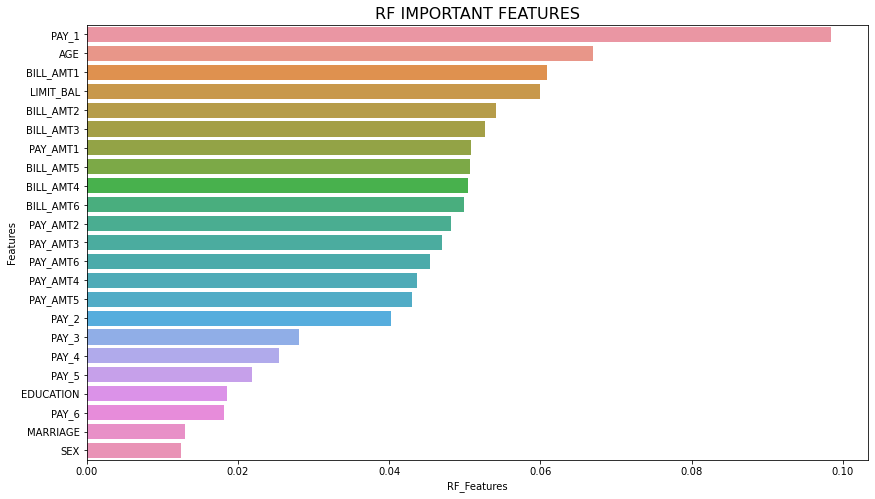

In [51]:
plt.figure(figsize = (14,8))
plt.title("RF IMPORTANT FEATURES",size = 16)
sns.barplot(x='RF_Features',y='Features',data = rf_important_features)
plt.show()

## Display the important features of Gradient Boost

In [53]:
gb_important_features = feature_importance_df.sort_values(by = 'GB_Features' ,ascending=False)
gb_important_features

,Features,RF_Features,GB_Features,ADB_Features,XGB_Features,LGB_Features
5,PAY_1,0.098391,0.631775,0.14,0.401390,99
6,PAY_2,0.040300,0.083061,0.04,0.138149,51
7,PAY_3,0.028108,0.035232,0.04,0.040880,38
11,BILL_AMT1,0.060927,0.032015,0.18,0.022602,222
0,LIMIT_BAL,0.059955,0.030571,0.06,0.023188,230
19,PAY_AMT3,0.047034,0.022843,0.06,0.022856,185
9,PAY_5,0.021801,0.018753,0.04,0.036961,48
18,PAY_AMT2,0.048205,0.018752,0.08,0.020840,196
17,PAY_AMT1,0.050788,0.017674,0.02,0.019551,199
10,PAY_6,0.018204,0.014239,0.02,0.028074,54


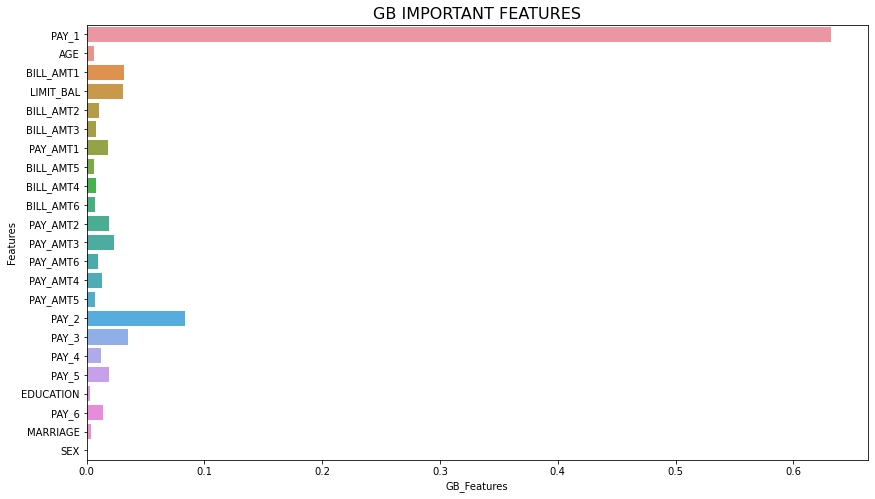

In [54]:
plt.figure(figsize = (14,8))
plt.title("GB IMPORTANT FEATURES",size = 16)
sns.barplot(x='GB_Features',y='Features',data = rf_important_features)
plt.show()

## Display the important features of AdaBoost 

In [55]:
adb_important_features = feature_importance_df.sort_values(by = 'ADB_Features' ,ascending=False)
adb_important_features

,Features,RF_Features,GB_Features,ADB_Features,XGB_Features,LGB_Features
11,BILL_AMT1,0.060927,0.032015,0.18,0.022602,222
5,PAY_1,0.098391,0.631775,0.14,0.401390,99
18,PAY_AMT2,0.048205,0.018752,0.08,0.020840,196
13,BILL_AMT3,0.052626,0.007939,0.06,0.019713,152
19,PAY_AMT3,0.047034,0.022843,0.06,0.022856,185
14,BILL_AMT4,0.050439,0.007990,0.06,0.017342,159
0,LIMIT_BAL,0.059955,0.030571,0.06,0.023188,230
7,PAY_3,0.028108,0.035232,0.04,0.040880,38
9,PAY_5,0.021801,0.018753,0.04,0.036961,48
12,BILL_AMT2,0.054176,0.010567,0.04,0.019959,147


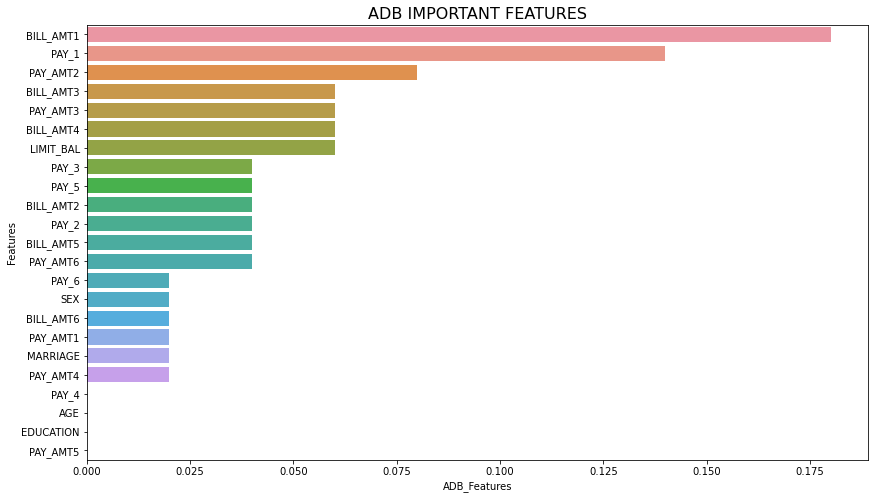

In [57]:
plt.figure(figsize = (14,8))
plt.title("ADB IMPORTANT FEATURES",size = 16)
sns.barplot(x='ADB_Features',y='Features',data = adb_important_features)
plt.show()

# The End !!!